<h1>Opening a Restaurant in Paris</h1>

<h2>1 - Import data (coordinates + population) on Paris boroughs/neighborhoods </h2>

The aim of this part is to retreive usefull data on the boroughs and the neighborhoods for the city of Paris (i.e : coordinates , population ).
Paris ,the city of light, is segmented into 20 boroughs (arrondissements in french) and 80 neighborhoods.

Let's import the packages used in this project.

In [3]:
import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

#!pip install geopy
!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

#!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library

print('Libraries imported.')

Solving environment: done

## Package Plan ##

  environment location: /Users/salaheddinekouta/opt/anaconda3

  added / updated specs:
    - geopy


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    geographiclib-1.50         |             py_0          34 KB  conda-forge
    geopy-1.21.0               |             py_0          58 KB  conda-forge
    ------------------------------------------------------------
                                           Total:          92 KB

The following NEW packages will be INSTALLED:

  geographiclib      conda-forge/noarch::geographiclib-1.50-py_0
  geopy              conda-forge/noarch::geopy-1.21.0-py_0
  python_abi         conda-forge/osx-64::python_abi-3.7-1_cp37m

The following packages will be UPDATED:

  conda                       pkgs/main::conda-4.8.3-py37_0 --> conda-forge::conda-4.8.3-py37hc8dfbb8_1



geopy-1.21.0         | 58 KB     | #

In [252]:
# open JSON file that contains geolocalisation information about boroughs in île-de-France region
with open('correspondances-code-insee-code-postal.json') as json_file:
    data = json.load(json_file)

Import data in the dataframe format , to be easy to handle
Source of Data : https://www.data.gouv.fr/fr/datasets/r/e88c6fda-1d09-42a0-a069-606d3259114e

In [253]:
ile_de_France_data = pd.read_json('correspondances-code-insee-code-postal.json')
ile_de_France_data.head()

,datasetid,recordid,fields,geometry,record_timestamp
0,correspondances-code-insee-code-postal,2bf36b38314b6c39dfbcd09225f97fa532b1fc45,"{'code_comm': '645', 'nom_dept': 'ESSONNE', 's...","{'type': 'Point', 'coordinates': [2.2517129721...",2016-09-21T00:29:06.175+02:00
1,correspondances-code-insee-code-postal,7ee82e74e059b443df18bb79fc5a19b1f05e5a88,"{'code_comm': '133', 'nom_dept': 'SEINE-ET-MAR...","{'type': 'Point', 'coordinates': [3.0529405055...",2016-09-21T00:29:06.175+02:00
2,correspondances-code-insee-code-postal,e2cd3186f07286705ed482a10b6aebd9de633c81,"{'code_comm': '378', 'nom_dept': 'ESSONNE', 's...","{'type': 'Point', 'coordinates': [2.1971816504...",2016-09-21T00:29:06.175+02:00
3,correspondances-code-insee-code-postal,868bf03527a1d0a9defe5cf4e6fa0a730d725699,"{'code_comm': '243', 'nom_dept': 'SEINE-ET-MAR...","{'type': 'Point', 'coordinates': [2.7097808131...",2016-09-21T00:29:06.175+02:00
4,correspondances-code-insee-code-postal,1bbcee92101fdb50f5f5fceb052681f2421ff961,"{'code_comm': '414', 'nom_dept': 'SEINE-ET-MAR...","{'type': 'Point', 'coordinates': [3.2582355268...",2016-09-21T00:29:06.175+02:00


we notice that the data we want to use is encapsulated in the form of dictionaries.
let's deconstruct the column field and use it as a dataframe

In [254]:
#create and append a new datframes while looping on the original df.
ile_de_France_data2 = pd.DataFrame()

for m in ile_de_France_data.fields:
    dict_new = m
    ile_de_France_data2 = df_idf_r.append(dict_new, ignore_index=True)

ile_de_France_data2.head()

,code_arr,code_cant,code_comm,code_dept,code_reg,geo_point_2d,geo_shape,id_geofla,insee_com,nom_comm,nom_dept,nom_region,population,postal_code,statut,superficie,z_moyen
0,3,03,645,91,11,"[48.750443119964764, 2.251712972144151]","{'type': 'Polygon', 'coordinates': [[[2.238024...",16275,91645,VERRIERES-LE-BUISSON,ESSONNE,ILE-DE-FRANCE,15.5,91370,Commune simple,999.0,121.0
1,3,20,133,77,11,"[48.41256065214989, 3.052940505560729]","{'type': 'Polygon', 'coordinates': [[[3.076046...",31428,77133,COURCELLES-EN-BASSEE,SEINE-ET-MARNE,ILE-DE-FRANCE,0.2,77126,Commune simple,1082.0,88.0
2,1,09,378,91,11,"[48.52726809075556, 2.19718165044305]","{'type': 'Polygon', 'coordinates': [[[2.203466...",30975,91378,MAUCHAMPS,ESSONNE,ILE-DE-FRANCE,0.3,91730,Commune simple,313.0,150.0
3,5,14,243,77,11,"[48.87307018579678, 2.7097808131278462]","{'type': 'Polygon', 'coordinates': [[[2.727542...",17000,77243,LAGNY-SUR-MARNE,SEINE-ET-MARNE,ILE-DE-FRANCE,20.2,77400,Chef-lieu canton,579.0,71.0
4,3,25,414,77,11,"[48.62891464105825, 3.2582355268439223]","{'type': 'Polygon', 'coordinates': [[[3.294591...",34949,77414,SAINT-HILLIERS,SEINE-ET-MARNE,ILE-DE-FRANCE,0.4,77160,Commune simple,1907.0,158.0


We want in this case just the data on Paris, so we limit the dataframe to Paris data.

In [255]:
Paris_data=ile_de_France_data2[ile_de_France_data2['nom_dept']=='PARIS'].reset_index(drop = True)
Paris_data.head()

,code_arr,code_cant,code_comm,code_dept,code_reg,geo_point_2d,geo_shape,id_geofla,insee_com,nom_comm,nom_dept,nom_region,population,postal_code,statut,superficie,z_moyen
0,1,23,109,75,11,"[48.87689616237872, 2.337460241388529]","{'type': 'Polygon', 'coordinates': [[[2.325754...",16867,75109,PARIS-9E-ARRONDISSEMENT,PARIS,ILE-DE-FRANCE,60.3,75009,Chef-lieu canton,218.0,44.0
1,1,24,110,75,11,"[48.87602855694339, 2.361112904561707]","{'type': 'Polygon', 'coordinates': [[[2.363856...",8429,75110,PARIS-10E-ARRONDISSEMENT,PARIS,ILE-DE-FRANCE,95.9,75010,Chef-lieu canton,288.0,45.0
2,1,30,116,75,11,"[48.86039876035177, 2.262099559395783]","{'type': 'Polygon', 'coordinates': [[[2.262784...",36580,75116,PARIS-16E-ARRONDISSEMENT,PARIS,ILE-DE-FRANCE,169.4,75016,Chef-lieu canton,1641.0,43.0
3,1,16,102,75,11,"[48.86790337886785, 2.344107166658533]","{'type': 'Polygon', 'coordinates': [[[2.350834...",14312,75102,PARIS-2E-ARRONDISSEMENT,PARIS,ILE-DE-FRANCE,22.4,75002,Chef-lieu canton,99.0,36.0
4,1,25,111,75,11,"[48.85941549762748, 2.378741060237548]","{'type': 'Polygon', 'coordinates': [[[2.399114...",36586,75111,PARIS-11E-ARRONDISSEMENT,PARIS,ILE-DE-FRANCE,152.7,75011,Chef-lieu canton,366.0,43.0


In [256]:
Paris_data.sort_values(by = 'postal_code',axis = 0, ascending = True, inplace = True)
Paris_data.head()

,code_arr,code_cant,code_comm,code_dept,code_reg,geo_point_2d,geo_shape,id_geofla,insee_com,nom_comm,nom_dept,nom_region,population,postal_code,statut,superficie,z_moyen
14,1,15,101,75,11,"[48.8626304851685, 2.336293446550539]","{'type': 'Polygon', 'coordinates': [[[2.344559...",36588,75101,PARIS-1ER-ARRONDISSEMENT,PARIS,ILE-DE-FRANCE,17.6,75001,Capitale d'état,181.0,33.0
3,1,16,102,75,11,"[48.86790337886785, 2.344107166658533]","{'type': 'Polygon', 'coordinates': [[[2.350834...",14312,75102,PARIS-2E-ARRONDISSEMENT,PARIS,ILE-DE-FRANCE,22.4,75002,Chef-lieu canton,99.0,36.0
7,1,17,103,75,11,"[48.86305413181178, 2.359361058970589]","{'type': 'Polygon', 'coordinates': [[[2.368401...",36582,75103,PARIS-3E-ARRONDISSEMENT,PARIS,ILE-DE-FRANCE,35.7,75003,Chef-lieu canton,116.0,35.0
17,1,18,104,75,11,"[48.854228281954754, 2.357361938142205]","{'type': 'Polygon', 'coordinates': [[[2.364320...",11667,75104,PARIS-4E-ARRONDISSEMENT,PARIS,ILE-DE-FRANCE,28.2,75004,Chef-lieu canton,160.0,33.0
15,1,19,105,75,11,"[48.844508659617546, 2.349859385560182]","{'type': 'Polygon', 'coordinates': [[[2.365944...",13706,75105,PARIS-5E-ARRONDISSEMENT,PARIS,ILE-DE-FRANCE,61.5,75005,Chef-lieu canton,252.0,42.0


Let's rearrange this datframe in more understandable way (keep the relevant columns to our study)

In [257]:
Paris_data=Paris_data[['nom_comm','nom_dept','nom_region','population','postal_code','geo_point_2d']].reset_index(drop = True)

Paris_data = Paris_data.rename(columns = {"nom_comm":"borough",'nom_dept':'City','nom_region':'Region'})

Paris_data.head()

,borough,City,Region,population,postal_code,geo_point_2d
0,PARIS-1ER-ARRONDISSEMENT,PARIS,ILE-DE-FRANCE,17.6,75001,"[48.8626304851685, 2.336293446550539]"
1,PARIS-2E-ARRONDISSEMENT,PARIS,ILE-DE-FRANCE,22.4,75002,"[48.86790337886785, 2.344107166658533]"
2,PARIS-3E-ARRONDISSEMENT,PARIS,ILE-DE-FRANCE,35.7,75003,"[48.86305413181178, 2.359361058970589]"
3,PARIS-4E-ARRONDISSEMENT,PARIS,ILE-DE-FRANCE,28.2,75004,"[48.854228281954754, 2.357361938142205]"
4,PARIS-5E-ARRONDISSEMENT,PARIS,ILE-DE-FRANCE,61.5,75005,"[48.844508659617546, 2.349859385560182]"


Description of the columns :
* Borough : known as arrondissement in Paris 
* City  : Paris
* Region : Ile de France 
* population: number of person in each borough per 1000
* postal_code : postal code of every borough
* geo_point_2d : coordinates of every arrondissement 

In [20]:
Paris_data.dtypes

borough          object
City             object
Region           object
population      float64
postal_code      object
geo_point_2d     object
dtype: object

In [258]:
# Transform label of each borough by number of borough
Paris_data.loc[0:8,'borough'] = Paris_data.loc[0:8,"borough"].str[6:7].astype(int)
Paris_data.loc[9:,'borough'] = Paris_data.loc[9:,"borough"].str[6:8].astype(int)

Paris_data.head()

,borough,City,Region,population,postal_code,geo_point_2d
0,1,PARIS,ILE-DE-FRANCE,17.6,75001,"[48.8626304851685, 2.336293446550539]"
1,2,PARIS,ILE-DE-FRANCE,22.4,75002,"[48.86790337886785, 2.344107166658533]"
2,3,PARIS,ILE-DE-FRANCE,35.7,75003,"[48.86305413181178, 2.359361058970589]"
3,4,PARIS,ILE-DE-FRANCE,28.2,75004,"[48.854228281954754, 2.357361938142205]"
4,5,PARIS,ILE-DE-FRANCE,61.5,75005,"[48.844508659617546, 2.349859385560182]"


In [32]:
Paris_data

,borough,City,Region,population,postal_code,geo_point_2d
0,1,PARIS,ILE-DE-FRANCE,17.6,75001,"[48.8626304851685, 2.336293446550539]"
1,2,PARIS,ILE-DE-FRANCE,22.4,75002,"[48.86790337886785, 2.344107166658533]"
2,3,PARIS,ILE-DE-FRANCE,35.7,75003,"[48.86305413181178, 2.359361058970589]"
3,4,PARIS,ILE-DE-FRANCE,28.2,75004,"[48.854228281954754, 2.357361938142205]"
4,5,PARIS,ILE-DE-FRANCE,61.5,75005,"[48.844508659617546, 2.349859385560182]"
5,6,PARIS,ILE-DE-FRANCE,43.1,75006,"[48.84896809191946, 2.332670898588416]"
6,7,PARIS,ILE-DE-FRANCE,57.4,75007,"[48.85608259819694, 2.312438687733857]"
7,8,PARIS,ILE-DE-FRANCE,40.3,75008,"[48.87252726662346, 2.312582560420059]"
8,9,PARIS,ILE-DE-FRANCE,60.3,75009,"[48.87689616237872, 2.337460241388529]"
9,10,PARIS,ILE-DE-FRANCE,95.9,75010,"[48.87602855694339, 2.361112904561707]"


In [262]:
Paris_data.dtypes

borough           int64
City             object
Region           object
population      float64
postal_code       int64
geo_point_2d     object
dtype: object

Now that we have the borough with the right coordinates , we will do the same for the neighborhoods. 
In this part we will do the same reasoning performed on the borough. the code will be quiet similar.

In [37]:
# Extract neighborhoods in Paris
df_raw_NB = pd.read_json('quartier_paris.json')

df_NB = pd.DataFrame()

for q in df_raw_NB.fields:
    dict_new = q
    df_NB = df_NB.append(dict_new, ignore_index=True)
    
df_NB = df_NB.rename(columns = {"c_ar":"borough","c_qu":"Number_Neighborhood","c_quinsee":"Number_insee_NB","l_qu":"Neighborhood"})

convert_dict = {'borough': int}

df_NB = df_NB.astype(convert_dict)

df_NB.head()

,borough,Number_Neighborhood,Number_insee_NB,geom,geom_x_y,Neighborhood,n_sq_ar,n_sq_qu,perimetre,surface
0,9,36.0,7510904.0,"{'type': 'Polygon', 'coordinates': [[[2.349708...","[48.8798119198, 2.344861291]",Rochechouart,750000009.0,750000036.0,2862.450525,5.004354e+05
1,12,47.0,7511203.0,"{'type': 'Polygon', 'coordinates': [[[2.391141...","[48.8352090499, 2.38621008421]",Bercy,750000012.0,750000047.0,6155.005036,1.902932e+06
2,1,2.0,7510102.0,"{'type': 'Polygon', 'coordinates': [[[2.349365...","[48.8622891081, 2.34489885831]",Halles,750000001.0,750000002.0,2606.417128,4.124585e+05
3,4,15.0,7510403.0,"{'type': 'Polygon', 'coordinates': [[[2.368512...","[48.851585175, 2.36476795387]",Arsenal,750000004.0,750000015.0,2878.559656,4.872649e+05
4,5,18.0,7510502.0,"{'type': 'Polygon', 'coordinates': [[[2.364561...","[48.8419401934, 2.35689388962]",Jardin-des-Plantes,750000005.0,750000018.0,4052.729521,7.983894e+05


In [38]:
df_NB = df_NB.join(Paris_data.set_index('borough'), on='borough')

df_NB.head()

,borough,Number_Neighborhood,Number_insee_NB,geom,geom_x_y,Neighborhood,n_sq_ar,n_sq_qu,perimetre,surface,City,Region,population,postal_code,geo_point_2d
0,9,36.0,7510904.0,"{'type': 'Polygon', 'coordinates': [[[2.349708...","[48.8798119198, 2.344861291]",Rochechouart,750000009.0,750000036.0,2862.450525,5.004354e+05,PARIS,ILE-DE-FRANCE,60.3,75009,"[48.87689616237872, 2.337460241388529]"
1,12,47.0,7511203.0,"{'type': 'Polygon', 'coordinates': [[[2.391141...","[48.8352090499, 2.38621008421]",Bercy,750000012.0,750000047.0,6155.005036,1.902932e+06,PARIS,ILE-DE-FRANCE,142.9,75012,"[48.83515623066034, 2.419807034965275]"
2,1,2.0,7510102.0,"{'type': 'Polygon', 'coordinates': [[[2.349365...","[48.8622891081, 2.34489885831]",Halles,750000001.0,750000002.0,2606.417128,4.124585e+05,PARIS,ILE-DE-FRANCE,17.6,75001,"[48.8626304851685, 2.336293446550539]"
3,4,15.0,7510403.0,"{'type': 'Polygon', 'coordinates': [[[2.368512...","[48.851585175, 2.36476795387]",Arsenal,750000004.0,750000015.0,2878.559656,4.872649e+05,PARIS,ILE-DE-FRANCE,28.2,75004,"[48.854228281954754, 2.357361938142205]"
4,5,18.0,7510502.0,"{'type': 'Polygon', 'coordinates': [[[2.364561...","[48.8419401934, 2.35689388962]",Jardin-des-Plantes,750000005.0,750000018.0,4052.729521,7.983894e+05,PARIS,ILE-DE-FRANCE,61.5,75005,"[48.844508659617546, 2.349859385560182]"


In [282]:
mapping_table = df_NB[['borough','Neighborhood','population']]
mapping_table.rename(columns={'borough':'Borough'},inplace=True)
mapping_table.head()

/Users/salaheddinekouta/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4223: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(**kwargs)


,Borough,Neighborhood,population
0,9,Rochechouart,60.3
1,12,Bercy,142.9
2,1,Halles,17.6
3,4,Arsenal,28.2
4,5,Jardin-des-Plantes,61.5


Now we will see how pictorially, the neighborhood segmentation is presented 

In [41]:
address = 'PARIS ,PAR'

geolocator = Nominatim(user_agent="ny_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Paris are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Paris are 48.8206809, 2.3635646.


In [44]:
# create map of Paris using latitude and longitude values
map_Paris = folium.Map(location=[latitude, longitude], zoom_start=12)

# add markers to map
for [lat, lng], postcode, borough, neighborhood in zip(df_NB['geom_x_y'], df_NB['postal_code'],df_NB['borough'], df_NB['Neighborhood']):
    label = '{},Arrondissement: {}, Postal code: {}'.format(neighborhood, borough, postcode)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_Paris)  
    
map_Paris

<h2>2 - Use Foursquare to explore Paris neighborhoods </h2>

The dataset, that will be used to explore different cuisines and restaurants in city of Paris, will be provided from Foursquare API. Foursquare API provides location based experiences with diverse information about venues, users, photos, and check-ins. The API supports real time access to places, Snap-to-Place that assigns users to specific locations, and Geo-tag. Additionally, Foursquare allows developers to build audience segments for analysis and measurement. JSON is the preferred response format.

In [48]:
import numpy as np # library to handle data in a vectorized manner
import pandas as pd # library for data analsysis
from PIL import Image # converting images into arrays

%matplotlib inline

import matplotlib as mpl
import matplotlib.pyplot as plt

mpl.style.use('ggplot') # optional: for ggplot-like style

# check for latest version of Matplotlib
print ('Matplotlib version: ', mpl.__version__) # >= 2.0.0


!pip install wordcloud

# import package and its set of stopwords
from wordcloud import WordCloud, STOPWORDS

print ('Wordcloud is installed and imported!')

Matplotlib version:  3.1.1
     |████████████████████████████████| 163kB 5.0MB/s eta 0:00:01
Wordcloud is installed and imported!


**Beforehand we will Define the Foursquare Credentials and Version**

In [49]:
# @hidden_cell
CLIENT_ID = 'H4HJARPROIYH2K1A4L124NQUKZUOFWGY4IY2Z4OJSEG43NZD' # your Foursquare ID
CLIENT_SECRET = 'KJCCRN4SJODFDUDXWXEV1AGOEVSDZKXHJLYEDOOIEZVH2OUA' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: H4HJARPROIYH2K1A4L124NQUKZUOFWGY4IY2Z4OJSEG43NZD
CLIENT_SECRET:KJCCRN4SJODFDUDXWXEV1AGOEVSDZKXHJLYEDOOIEZVH2OUA


**We will do a test on a one neighborhood and try to generalize that to all the neighborhoods in our data set**

In [73]:
# Get neighborhood latitude and longitude
element = 0
neighborhood_latitude = df_NB.loc[element, 'geom_x_y'][0] # neighborhood latitude value
neighborhood_longitude = df_NB.loc[element, 'geom_x_y'][1] # neighborhood longitude value

neighborhood_name = df_NB.loc[element, 'Neighborhood'] # neighborhood name

print('Latitude and longitude values of {} are {}, {}.'.format(neighborhood_name, 
                                                               neighborhood_latitude, 
                                                               neighborhood_longitude))

Latitude and longitude values of Rochechouart are 48.8798119198, 2.344861291.


Now, let's get the top 100 venues that are in Rochechouart within a radius of 500 meters

In [74]:
# @hidden_cell
radius = 500
LIMIT = 100

url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&ll={},{}&v={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, neighborhood_latitude, neighborhood_longitude, VERSION, radius, LIMIT)
results = requests.get(url).json()

From previous project We know that all the information is in the items key. Before we proceed, we will borrow the get_category_type function to extract the category of the venue

In [75]:
# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

**Now we are ready to clean the json and structure it into a pandas dataframe.**

In [76]:
venues = results['response']['groups'][0]['items']
    
nearby_venues = json_normalize(venues) # flatten JSON

# filter columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues =nearby_venues.loc[:, filtered_columns]

# filter the category for each row
nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)

# clean columns
nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]

nearby_venues.head()

,name,categories,lat,lng
0,Mamiche,Bakery,48.880112,2.343699
1,Pizza di Loretta,Pizza Place,48.880634,2.344011
2,Les 36 Corneil,Wine Bar,48.878997,2.345501
3,La Ferme Saint Hubert,Cheese Shop,48.878908,2.345428
4,Le Barbe à Papa,French Restaurant,48.879654,2.347438


In [72]:
print('{} venues were returned by Foursquare.'.format(nearby_venues.shape[0]))

3 venues were returned by Foursquare.


**In this case we will do the same for the all the neighborhoods**

we will construct a function to take the whole column of neighborhoods

In [83]:
def getNearbyVenues(names, geom_x_y, radius=500):
    
    venues_list=[]
    for name, [lat, lng] in zip(names, geom_x_y):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [84]:
paris_venues = getNearbyVenues(names=df_NB['Neighborhood'],
                                   geom_x_y=df_NB['geom_x_y']
                                  )

Rochechouart
Bercy
Halles
Arsenal
Jardin-des-Plantes
Porte-Saint-Martin
Roquette
Picpus
Plaisance
Quinze-Vingts
Saint-Victor
Madeleine
Saint-Fargeau
Porte-Dauphine
Grandes-Carrières
Europe
Sainte-Marguerite
Val-de-Grâce
Parc-de-Montsouris
Necker
Saint-Lambert
Père-Lachaise
La Chapelle
Batignolles
Arts-et-Métiers
Archives
Faubourg-du-Roule
Monnaie
Odéon
Champs-Elysées
Maison-Blanche
Croulebarbe
Vivienne
Enfants-Rouges
Saint-Germain-des-Prés
Saint-Vincent-de-Paul
Saint-Ambroise
Bel-Air
Montparnasse
Plaine de Monceaux
Ecole-Militaire
Grenelle
Auteuil
Folie-Méricourt
Salpêtrière
Place-Vendôme
Combat
Charonne
Javel
Sorbonne
Saint-Georges
Chaussée-d'Antin
Palais-Royal
Saint-Merri
Notre-Dame
Gros-Caillou
Invalides
Faubourg-Montmartre
Gaillon
Amérique
Saint-Gervais
Saint-Thomas-d'Aquin
Porte-Saint-Denis
Saint-Germain-l'Auxerrois
Villette
Mail
Bonne-Nouvelle
Gare
Clignancourt
Goutte-d'Or
Notre-Dame-des-Champs
Petit-Montrouge
Pont-de-Flandre
Muette
Chaillot
Epinettes
Sainte-Avoie
Hôpital-Saint-L

In [86]:
paris_venues.groupby('Neighborhood').count()

,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,
Amérique,13,13,13,13,13,13
Archives,100,100,100,100,100,100
Arsenal,65,65,65,65,65,65
Arts-et-Métiers,100,100,100,100,100,100
Auteuil,15,15,15,15,15,15
Batignolles,100,100,100,100,100,100
Bel-Air,5,5,5,5,5,5
Belleville,41,41,41,41,41,41
Bercy,75,75,75,75,75,75


In [94]:
restaurant_venues = paris_venues[paris_venues['Venue Category'].str.contains('Restaurant', regex=False)].reset_index(drop = True)

restaurant_venues = restaurant_venues.rename(columns = {"Venue":"Restaurant","Venue Latitude":"Restaurant Latitude","Venue Longitude":"Restaurant Longitude","Venue Category":"Restaurant Category"})

restaurant_venues['Restaurant Category'] = restaurant_venues['Restaurant Category'].str[-11::-1].str[-1::-1]

restaurant_venues.shape

restaurant_venues.replace('', 'Restaurant', inplace=True)

count = restaurant_venues['Restaurant Category'].str.split().apply(len).value_counts()
count.index = count.index.astype(str) + ' words:'
count.sort_index(inplace=True)
count

1 words:    1675
2 words:      48
3 words:      33
4 words:       1
Name: Restaurant Category, dtype: int64

let's do a simulation on the Moroccan restaurants in Paris 

In [100]:
restaurant_venues2=restaurant_venues[restaurant_venues['Restaurant Category']=='Moroccan ']

In [101]:
restaurant_venues2.head()

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Restaurant,Restaurant Latitude,Restaurant Longitude,Restaurant Category
81,Jardin-des-Plantes,48.841940,2.356894,Aux Portes de l'Orient,48.841648,2.355591,Moroccan
93,Jardin-des-Plantes,48.841940,2.356894,Founti Agadir,48.839586,2.351150,Moroccan
121,Porte-Saint-Martin,48.871245,2.361504,Le Bec Fin,48.869770,2.355945,Moroccan
143,Roquette,48.857064,2.380364,Le Souk,48.853599,2.376796,Moroccan
406,Père-Lachaise,48.863719,2.395273,La Nouvelle Étoile,48.867504,2.396231,Moroccan


In [105]:
restaurant_venues2.shape

(22, 7)

In [104]:
# create map of Paris using latitude and longitude values
map_Paris = folium.Map(location=[latitude, longitude], zoom_start=12)

# add markers to map
for [lat, lng], postcode, borough, neighborhood in zip([restaurant_venues2['Restaurant Latitude'],restaurant_venues2['Restaurant Longitude']]):
    label = '{},Arrondissement: {}, Postal code: {}'.format(neighborhood, borough, postcode)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='red',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_Paris)  
    
map_Paris

<h2>3 - Farmer market Analysis : Paris borough </h2>

We assume that the proximity to farmer markets , will present a competitive advantage for opening our restaurant. Preparing meals with fresh ingredients is paramount. The aim of this study is to find the borough with a high number of markets.



we will begin by importing the data 
source of data : https://opendata.paris.fr/explore/dataset/marches-decouverts/download/?format=json&timezone=Europe/Berlin'

In [106]:
Paris_market = pd.read_json('https://opendata.paris.fr/explore/dataset/marches-decouverts/download/?format=json&timezone=Europe/Berlin')
Paris_market.head()

,datasetid,recordid,fields,geometry,record_timestamp
0,marches-decouverts,d3a5631266172870956cfaf2542f802e436722d9,"{'produit': 'Alimentaire', 'secteur': 'C', 'no...","{'type': 'Point', 'coordinates': [2.3447171000...",2020-04-22T18:00:46.729+02:00
1,marches-decouverts,65a0dfc8355aa3fb478f735d5ff182bf4a0354c6,"{'mardi': 0, 'lineaire': 142.0, 'nom_long': 'M...","{'type': 'Point', 'coordinates': [2.3870680979...",2020-04-22T18:00:46.729+02:00
2,marches-decouverts,a1fee7933b1518d850cf58a0f6242563b4f151e8,"{'produit': 'Alimentaire', 'secteur': 'C', 'no...","{'type': 'Point', 'coordinates': [2.2748920823...",2020-04-22T18:00:46.729+02:00
3,marches-decouverts,4fd77fbf00024b580965a5ebea6c8f34e871880e,"{'produit': 'Alimentaire', 'secteur': 'B', 'no...","{'type': 'Point', 'coordinates': [2.3924168184...",2020-04-22T18:00:46.729+02:00
4,marches-decouverts,c07573415db53c06e65ec5cc6d3ccaa00f5faccd,"{'mardi': 0, 'lineaire': 637.0, 'nom_long': 'M...","{'type': 'Point', 'coordinates': [2.3533114763...",2020-04-22T18:00:46.729+02:00


The dataset below gives information about existed markets in Paris for buying ingredient. Columns consists on:

* ardt: Borough
* dimanche: if market opens Sunday (1) if not (0)
* geo_point_2d: Localisation of market
* gestionnaire: name of company that manage the market
* Information about opening time and closing time
* id_marche: Identification of market
* localisation: Adress of market
* jours_tenue: Days of opening of markets
* produit: product that are bought in the market

again we will parse the fields column 

In [107]:
df_market_r = pd.DataFrame()
for m in Paris_market.fields:
    dict_new = m
    df_market_r = df_market_r.append(dict_new, ignore_index=True)

df_market = df_market_r[df_market_r.produit == 'Alimentaire']
df_market.head()

,ardt,dimanche,geo_point_2d,geo_shape,gestionnaire,h_deb_sem_1,h_fin_sem_1,id_marche,jeudi,jours_tenue,lineaire,localisation,lundi,mardi,mercredi,nom_court,nom_long,produit,samedi,secteur,vendredi,h_deb_dim,h_fin_dim,h_deb_sam,h_fin_sam
0,9.0,0.0,"[48.88198463, 2.34471710004]","{'type': 'Polygon', 'coordinates': [[[2.344507...",Dadoun,15:00,20:30,12.0,0.0,vendredi apm,176.0,place d'Anvers le long du square d'Anvers en v...,0.0,0.0,0.0,ANVERS,MARCHÉ ANVERS,Alimentaire,0.0,C,1.0,NaN,NaN,NaN,NaN
1,12.0,1.0,"[48.8358272969, 2.3870680979]","{'type': 'Polygon', 'coordinates': [[[2.387303...",Bensidoun,10:00,20:30,20.0,0.0,"mercredi , dimanche",142.0,entre le n° 14 place Lachambeaudie et le n°11 ...,0.0,0.0,1.0,BERCY,MARCHÉ BERCY,Alimentaire,0.0,B,0.0,07:00,15:00,NaN,NaN
2,16.0,0.0,"[48.8519641378, 2.27489208238]","{'type': 'Polygon', 'coordinates': [[[2.275891...",Dadoun,07:00,14:30,48.0,0.0,"mardi, vendredi",352.0,du n° 31 rue Gros au n° 1 rue la Fontaine,0.0,1.0,0.0,GROS LA FONTAINE,MARCHÉ GROS LA FONTAINE,Alimentaire,0.0,C,1.0,NaN,NaN,NaN,NaN
3,12.0,0.0,"[48.8392712255, 2.39241681845]","{'type': 'MultiPolygon', 'coordinates': [[[[2....",Bensidoun,07:00,14:30,71.0,0.0,"mardi, vendredi",1182.0,sur les trottoirs pair et impair du boulevard ...,0.0,1.0,0.0,DAUMESNIL,MARCHÉ DAUMESNIL,Alimentaire,0.0,B,1.0,NaN,NaN,NaN,NaN
4,18.0,0.0,"[48.884006836, 2.3533114763]","{'type': 'Polygon', 'coordinates': [[[2.355248...",Dadoun,07:00,14:30,54.0,0.0,"mercredi, samedi",637.0,terre-plein du boulevard de la Chapelle entre ...,0.0,0.0,1.0,BARBES,MARCHÉ BARBES,Alimentaire,1.0,C,0.0,NaN,NaN,07:00,15:00


In [108]:
df_market = df_market.rename(columns = {"ardt":"Borough"})
convert_dict = {'Borough': int}
df_market = df_market.astype(convert_dict)
df_market.head()

,Borough,dimanche,geo_point_2d,geo_shape,gestionnaire,h_deb_sem_1,h_fin_sem_1,id_marche,jeudi,jours_tenue,lineaire,localisation,lundi,mardi,mercredi,nom_court,nom_long,produit,samedi,secteur,vendredi,h_deb_dim,h_fin_dim,h_deb_sam,h_fin_sam
0,9,0.0,"[48.88198463, 2.34471710004]","{'type': 'Polygon', 'coordinates': [[[2.344507...",Dadoun,15:00,20:30,12.0,0.0,vendredi apm,176.0,place d'Anvers le long du square d'Anvers en v...,0.0,0.0,0.0,ANVERS,MARCHÉ ANVERS,Alimentaire,0.0,C,1.0,NaN,NaN,NaN,NaN
1,12,1.0,"[48.8358272969, 2.3870680979]","{'type': 'Polygon', 'coordinates': [[[2.387303...",Bensidoun,10:00,20:30,20.0,0.0,"mercredi , dimanche",142.0,entre le n° 14 place Lachambeaudie et le n°11 ...,0.0,0.0,1.0,BERCY,MARCHÉ BERCY,Alimentaire,0.0,B,0.0,07:00,15:00,NaN,NaN
2,16,0.0,"[48.8519641378, 2.27489208238]","{'type': 'Polygon', 'coordinates': [[[2.275891...",Dadoun,07:00,14:30,48.0,0.0,"mardi, vendredi",352.0,du n° 31 rue Gros au n° 1 rue la Fontaine,0.0,1.0,0.0,GROS LA FONTAINE,MARCHÉ GROS LA FONTAINE,Alimentaire,0.0,C,1.0,NaN,NaN,NaN,NaN
3,12,0.0,"[48.8392712255, 2.39241681845]","{'type': 'MultiPolygon', 'coordinates': [[[[2....",Bensidoun,07:00,14:30,71.0,0.0,"mardi, vendredi",1182.0,sur les trottoirs pair et impair du boulevard ...,0.0,1.0,0.0,DAUMESNIL,MARCHÉ DAUMESNIL,Alimentaire,0.0,B,1.0,NaN,NaN,NaN,NaN
4,18,0.0,"[48.884006836, 2.3533114763]","{'type': 'Polygon', 'coordinates': [[[2.355248...",Dadoun,07:00,14:30,54.0,0.0,"mercredi, samedi",637.0,terre-plein du boulevard de la Chapelle entre ...,0.0,0.0,1.0,BARBES,MARCHÉ BARBES,Alimentaire,1.0,C,0.0,NaN,NaN,07:00,15:00


In [354]:
df_market_count = df_market.groupby('Borough').count()
df_market_count=df_market_count[['dimanche']]

In [355]:
df_market_count2=df_market_count['dimanche']

The mapping table in this case is a table to reunite all the information needed for the clustering

In [286]:
mapping_table2=mapping_table.join(df_market_count,on='Borough')
mapping_table2.rename(columns={'dimanche':'NB_Market'})
mapping_table2.fillna(0)

,Borough,Neighborhood,population,dimanche
0,9,Rochechouart,60.3,1.0
1,12,Bercy,142.9,7.0
2,1,Halles,17.6,2.0
3,4,Arsenal,28.2,1.0
4,5,Jardin-des-Plantes,61.5,3.0
5,10,Porte-Saint-Martin,95.9,1.0
6,11,Roquette,152.7,5.0
7,12,Picpus,142.9,7.0
8,14,Plaisance,137.2,5.0
9,12,Quinze-Vingts,142.9,7.0


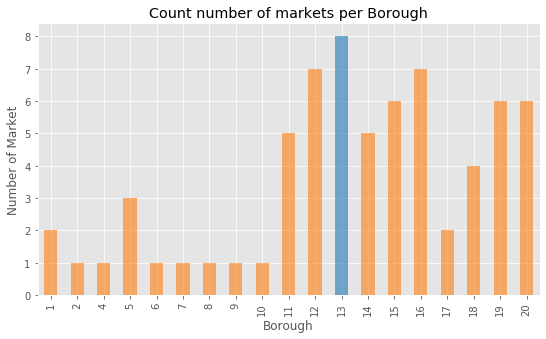

In [356]:
# Plot of number of food markets for each borough
import seaborn as sns
colors_list2 = ['#ff7f0e', '#ff7f0e', '#ff7f0e', '#ff7f0e', '#ff7f0e',
 '#ff7f0e', '#ff7f0e', '#ff7f0e', '#ff7f0e', '#ff7f0e','#ff7f0e','#1f77b4','#ff7f0e','#ff7f0e','#ff7f0e','#ff7f0e','#ff7f0e','#ff7f0e','#ff7f0e']
df_market_count2.plot(kind='bar', figsize=(9, 5), rot=90,
          alpha=0.6,
          color=colors_list2) 
plt.title('Count number of markets per Borough')
plt.ylabel('Number of Market')
plt.xlabel('Borough') 
plt.xticks(rotation=90) 
plt.show()

We see from the graph that the 13 arrondissement is the one with the highest number of markets (8)

In [110]:
address = 'Paris, PAR'

geolocator = Nominatim(user_agent="Jupyter")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Paris are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Paris are 48.8206809, 2.3635646.


In [172]:
# create map of Paris using latitude and longitude values
map_markets = folium.Map(location=[latitude, longitude], zoom_start=11)

# add markers to map
for [lat, lng], FacilityName, borough in zip(df_market['geo_point_2d'], df_market['nom_long'], df_market['Borough']):
            label = '{}, Arrondissement {}'.format(FacilityName, borough)
            label = folium.Popup(label, parse_html=True)
            if borough==13 :
                folium.CircleMarker(
                    [lat, lng],
                    radius=5,
                    popup=label,
                    color='green',
                    fill=True,
                    fill_color='green',
                    fill_opacity=0.7,
                    parse_html = False).add_to(map_markets)
            else: 
                folium.CircleMarker(
                    [lat, lng],
                    radius=5,
                    popup=label,
                    color='red',
                    fill=True,
                    fill_color='red',
                    fill_opacity=0.7,
                    parse_html = False).add_to(map_markets)
            
map_markets

We can see the same from the map (13 arrondissement with 8 markets represented in green)

<h2>4 - Event and activities around Paris </h2>

In this section we will be spotting the Borough in Paris where most of the event are held. The aim is to have a broad idea on the events/activities concentration in Paris. Crossed with the number of population , events tend to attract more festive people , whom they need mostly to find a food spot.

we will begin to import the data
source of data : https://opendata.paris.fr/explore/dataset/que-faire-a-paris-/export/?disjunctive.category&disjunctive.tags&disjunctive.address_zipcode&disjunctive.address_city&disjunctive.access_type&disjunctive.price_type&basemap=jawg.transports&location=7,47.73195,2.41324

In [177]:
Event_Paris = pd.read_json('que-faire-a-paris-.json')
Event_Paris

,datasetid,recordid,fields,geometry,record_timestamp
0,que-faire-a-paris-,c9757ade5d7afbafc91adc8dccb3ee6410e0bde0,"{'blind': 0, 'pmr': 0, 'date_end': '2020-06-23...","{'type': 'Point', 'coordinates': [2.35367, 48....",2020-04-26T06:00:21.551+02:00
1,que-faire-a-paris-,78d9edc89f8357b9e111bbc43fc538bcb7cb52ae,"{'blind': 0, 'pmr': 0, 'date_end': '2020-05-17...","{'type': 'Point', 'coordinates': [2.2790649765...",2020-04-26T06:00:21.551+02:00
2,que-faire-a-paris-,f6358d53edc9fd10ed988792febd58fd4f90eff1,"{'blind': 0, 'pmr': 0, 'date_end': '2020-05-21...","{'type': 'Point', 'coordinates': [2.347889, 48...",2020-04-26T06:00:21.551+02:00
3,que-faire-a-paris-,d4acf60c314caa39c8c3a9ae3e8227cfa57a67ca,"{'blind': 0, 'pmr': 0, 'date_end': '2020-04-27...","{'type': 'Point', 'coordinates': [2.3578609999...",2020-04-26T06:00:21.551+02:00
4,que-faire-a-paris-,e7d4bbec331040125060ab7efbf22cb5319b929b,"{'blind': 0, 'pmr': 0, 'date_end': '2020-04-30...","{'type': 'Point', 'coordinates': [2.3742658999...",2020-04-26T06:00:21.551+02:00
5,que-faire-a-paris-,e55626eebf8938a2d29a05aace00341ec8981ab6,"{'blind': 0, 'pmr': 0, 'date_end': '2020-06-19...","{'type': 'Point', 'coordinates': [2.3534678140...",2020-04-26T06:00:21.551+02:00
6,que-faire-a-paris-,55a81783de4ce3c9eaa08f96d7f82673a986696e,"{'blind': 0, 'pmr': 0, 'date_end': '2020-12-31...","{'type': 'Point', 'coordinates': [2.331231, 48...",2020-04-26T06:00:21.551+02:00
7,que-faire-a-paris-,805817fef94e9e8d03829f8d0cca9b35b3f53504,"{'blind': 0, 'pmr': 0, 'date_end': '2020-12-19...",NaN,2020-04-26T06:00:21.551+02:00
8,que-faire-a-paris-,c348fd9725663406443b3b47c6400ea1a1f61c13,"{'blind': 0, 'pmr': 0, 'date_end': '2020-12-12...",NaN,2020-04-26T06:00:21.551+02:00
9,que-faire-a-paris-,f981bad4af6cfc72616acfc8235aae44fc3565ff,"{'blind': 0, 'pmr': 0, 'date_end': '2020-12-16...",NaN,2020-04-26T06:00:21.551+02:00


In [197]:
df_event = pd.DataFrame()
for m in Event_Paris.fields:
    dict_new = m
    df_event = df_event.append(dict_new, ignore_index=True)

#df_market = df_market_r[df_market_r.produit == 'Alimentaire']
df_event.head()

,access_link,access_type,address_city,address_name,address_street,address_zipcode,blind,category,contact_url,cover,cover_alt,cover_credit,cover_url,date_description,date_end,date_start,deaf,description,id,lat_lon,lead_text,occurrences,pmr,price_detail,price_type,programs,tags,title,transport,updated_at,url,access_mail,access_phone,contact_facebook,contact_mail,contact_name,contact_phone,contact_twitter
0,https://exploreparis.com/fr/138-la-gare-du-nor...,reservation,Paris,Gare du Nord,112 rue de Maubeuge,75010,0.0,Animations -> Visite guidée,https://www.tourisme93.com/,"{'mimetype': 'image/jpeg', 'format': 'JPEG', '...",Gare du Nord,-,https://quefaire-api.paris.fr/images/60562,Le mardi 25 février 2020<br />de 10h à 11h30<b...,2020-06-23T11:30:00+02:00,2020-02-25T10:00:00+01:00,0.0,<p>Première étape de la balade : <b>la gare du...,90910,"[48.8801, 2.35367]",La gare du Nord est aujourd'hui la 2ème gare d...,2020-02-25T10:00:00+01:00_2020-02-25T11:30:00+...,0.0,11 euros,payant,Les gares de Paris se visitent (https://quefai...,Plein air;En famille,Balade urbaine de la Gare du Nord et son quartier,"4, 5 : Gare du Nord (97m)\n7 : Poissonnière (4...",2020-02-26T10:57:59+01:00,https://quefaire.paris.fr/90910/visite-de-la-g...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,http://resas.scribeparis.org,conseillee,Paris,Espace Protestant Marc Boegner,"27, rue de l'Annonciation",75016,0.0,Spectacles -> Théâtre,http://www.scribeparis.org/,"{'mimetype': 'image/jpeg', 'format': 'JPEG', '...",NaN,NaN,https://quefaire.paris.fr/images/idee-0.jpg,Le samedi 16 mai 2020<br />de 20h à 22h<br />L...,2020-05-17T19:00:00+02:00,2020-05-16T20:00:00+02:00,0.0,<p><i>L'Assemblée des femmes</i> est une pièce...,102938,"[48.85677778489816, 2.279064976542242]",Nous serions ravis de vous faire découvrir not...,2020-05-16T20:00:00+02:00_2020-05-16T22:00:00+...,0.0,NaN,gratuit,NaN,Solidaire;En famille,Pièce de théâtre solidaire : l'Assemblée des f...,9 : La Muette (394m)\n6 : Passy (507m)\nBoulai...,2020-02-24T16:17:29+01:00,https://quefaire.paris.fr/102938/piece-de-thea...,reservation@scribeparis.org,0651111596,https://www.facebook.com/scribe.paris,scribeparis@gmail.com,Association SCRIBE-Paris,0651111596,https://twitter.com/SCRIBE_Paris
2,https://www.lebaisersale.com/agenda?event=2020...,conseillee,Paris,Le Baiser Salé,58 rue des Lombards,75001,0.0,Concerts -> Jazz,https://www.lebaisersale.com,"{'mimetype': 'image/jpeg', 'format': 'JPEG', '...",CRISTINA VILALLONGA,NL,https://quefaire-api.paris.fr/images/67289,Le jeudi 21 mai 2020<br />de 19h à 20h45<br />,2020-05-21T20:45:00+02:00,2020-05-21T19:00:00+02:00,0.0,"<p class=""""><i><b>#FestivalLesCaribéennesdeMai...",102932,"[48.859756, 2.347889]",Voix intemporelle du célèbre groupe de tango é...,2020-05-21T19:00:00+02:00_2020-05-21T20:45:00+...,0.0,"Tarif plein 20€\n- de 26 ans, étudiants de con...",payant,NaN,Musique,CRISTINA VILALLONGA & ALBERT BOVER « NUS »,"1, 4, 7, 11, 14 : Châtelet (205m)\n4 : Les Hal...",2020-02-23T02:23:07+01:00,https://quefaire.paris.fr/102932/cristina-vila...,NaN,0142333771,https://www.facebook.com/lebaisersale,NaN,NaN,0142333771,https://www.twitter.com/lebaisersale
3,http://www.promotheatre.com/marais_(theatre_du...,conseillee,Paris,Théâtre du Marais,37 rue volta,75003,0.0,Spectacles -> Humour,NaN,"{'mimetype': 'image/jpeg', 'format': 'JPEG', '...",Marc Tourneboeuf,A2P,https://quefaire-api.paris.fr/images/67283,Du 24 février au 27 avril 2020 : <br />lundi d...,2020-04-27T21:00:00+02:00,2020-02-24T20:00:00+01:00,0.0,"<p class=""""><br></p><p>Un seul en scène rempli...",68496,"[48.866268, 2.3578609999999998]",Un seul en scène rempli d’humour et de poésie ...,2020-02-24T20:00:00+01:00_2020-02-24T21:00:00+...,0.0,de 10 à 20 euros,payant,NaN,Insolite;En famille,Marc Tourneboeuf - Le Récit Poétique...,"3, 11 : Arts et Métiers (195m)\n3 : Temple (313m)",2020-02-22T21:29:11+01:00,https://quefaire.paris.fr/68496/marc-tourneboe...,NaN,NaN,NaN,NaN,A2 Productions,NaN,NaN
4,https://theatredebelleville.mapado.com,con

In [198]:
df_event=df_event[df_event['address_city']=='Paris'].reset_index(drop = True)

In [208]:
df_market_count = df_event.groupby('address_zipcode').count().reset_index()
#df_market_count=df_market_count['address_zipcode']
df_market_count2=df_market_count.iloc[1:21]
df_market_count2.head()

,address_zipcode,access_link,access_type,address_city,address_name,address_street,blind,category,contact_url,cover,cover_alt,cover_credit,cover_url,date_description,date_end,date_start,deaf,description,id,lat_lon,lead_text,occurrences,pmr,price_detail,price_type,programs,tags,title,transport,updated_at,url,access_mail,access_phone,contact_facebook,contact_mail,contact_name,contact_phone,contact_twitter
1,75001,118,154,155,152,155,155,155,149,155,115,115,155,155,155,155,155,155,155,150,154,155,155,106,154,13,153,155,140,155,155,13,36,110,53,121,121,88
2,75002,20,22,22,22,22,22,22,21,22,22,22,22,22,22,22,22,22,22,20,22,22,22,11,22,6,15,22,22,22,22,9,8,18,15,21,13,11
3,75003,29,56,56,55,56,56,56,42,56,39,39,56,56,56,56,56,56,56,55,56,56,56,27,56,10,47,56,56,56,56,11,13,37,23,56,35,10
4,75004,35,52,52,52,52,52,52,48,52,51,51,52,52,52,52,52,52,52,50,52,52,52,38,52,6,48,52,51,52,52,30,28,27,37,50,35,12
5,75005,14,44,44,42,44,44,44,39,44,39,39,44,44,44,44,44,44,44,43,43,44,44,12,43,10,37,44,43,44,44,10,9,30,37,43,39,14


we will try to convert the arrondissement postal code into number of borough

In [227]:
convert_dict = {'address_zipcode': int}
df_market_count2 = df_market_count2.astype(convert_dict)
dict = {75001: 1,
        75002: 2,
        75003: 3,
        75004: 4,
        75005: 5,
        75006: 6,
        75007: 7,
        75008: 8,
        75009: 9,
        75010: 10,
        75011: 11,
        75012: 12,
        75013: 13,
        75014: 14,
        75015: 15,
        75016: 16,
        75017: 17,
        75018: 18,
        75019: 19,
        75020: 20}
df_market_count2['address_zipcode']=df_market_count2['address_zipcode'].map(dict)
df_market_count2.head()

,address_zipcode,access_link,access_type,address_city,address_name,address_street,blind,category,contact_url,cover,cover_alt,cover_credit,cover_url,date_description,date_end,date_start,deaf,description,id,lat_lon,lead_text,occurrences,pmr,price_detail,price_type,programs,tags,title,transport,updated_at,url,access_mail,access_phone,contact_facebook,contact_mail,contact_name,contact_phone,contact_twitter
1,1,118,154,155,152,155,155,155,149,155,115,115,155,155,155,155,155,155,155,150,154,155,155,106,154,13,153,155,140,155,155,13,36,110,53,121,121,88
2,2,20,22,22,22,22,22,22,21,22,22,22,22,22,22,22,22,22,22,20,22,22,22,11,22,6,15,22,22,22,22,9,8,18,15,21,13,11
3,3,29,56,56,55,56,56,56,42,56,39,39,56,56,56,56,56,56,56,55,56,56,56,27,56,10,47,56,56,56,56,11,13,37,23,56,35,10
4,4,35,52,52,52,52,52,52,48,52,51,51,52,52,52,52,52,52,52,50,52,52,52,38,52,6,48,52,51,52,52,30,28,27,37,50,35,12
5,5,14,44,44,42,44,44,44,39,44,39,39,44,44,44,44,44,44,44,43,43,44,44,12,43,10,37,44,43,44,44,10,9,30,37,43,39,14


In [298]:
df_event_count =df_market_count2[['address_zipcode','address_street']]
df_event_count.rename(columns={'address_zipcode':'Borough'},inplace=True)

In [301]:
df_event_count.dtypes

Borough           int64
address_street    int64
dtype: object

In [304]:
mapping_table3=mapping_table2.join(df_event_count.set_index('Borough'),on='Borough')
mapping_table3.rename(columns={'address_street':'NB_Events','dimanche':'NB_Market'},inplace=True)
mapping_table3.head()

,Borough,Neighborhood,population,NB_Market,NB_Events
0,9,Rochechouart,60.3,1.0,33
1,12,Bercy,142.9,7.0,81
2,1,Halles,17.6,2.0,155
3,4,Arsenal,28.2,1.0,52
4,5,Jardin-des-Plantes,61.5,3.0,44


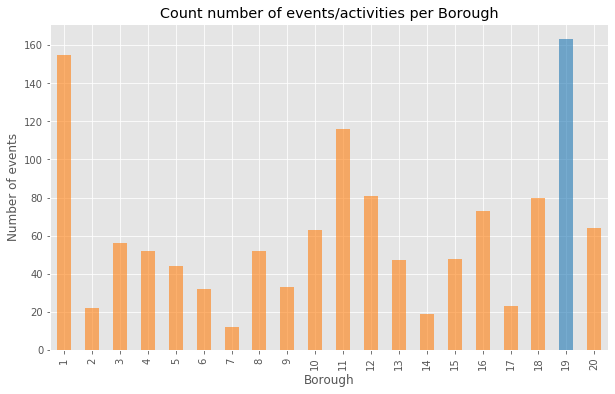

In [231]:
# Plot of number of food markets for each borough
import seaborn as sns
colors_list = ['#ff7f0e', '#ff7f0e', '#ff7f0e', '#ff7f0e', '#ff7f0e',
 '#ff7f0e', '#ff7f0e', '#ff7f0e', '#ff7f0e', '#ff7f0e','#ff7f0e','#ff7f0e','#ff7f0e','#ff7f0e','#ff7f0e','#ff7f0e','#ff7f0e','#ff7f0e','#1f77b4']
df_event_count.plot(kind='bar', figsize=(10, 6), rot=90,
          alpha=0.6,
          color=colors_list) 
plt.title('Count number of events/activities per Borough')
plt.ylabel('Number of events')
plt.xlabel('Borough') 
plt.xticks(rotation=90) 
plt.show()

we can conclude that the 19 arrondissement is the one with the highest events number through the year

<h1>5. Segmenting and clustering Neighborhoods in Paris</h1>

In this section of the project, we will use the Foursquare API to explore neighborhoods in each borough (or arrondissement in french). We will use the explore function to get the most common venue categories in each neighborhood, and then use this feature to group the neighborhoods into clusters. We will use the k-means clustering algorithm to complete this task. Finally, we will use the Folium library to visualize the neighborhoods in each one of 20 boroughis in paris and their emerging clusters.

In [233]:
import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

#!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors
import matplotlib.pyplot as plt

# import k-means from clustering stage
from sklearn.cluster import KMeans

from sklearn.metrics import silhouette_score

#!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library

print('Libraries imported.')

Libraries imported.


In [234]:
paris_venues.groupby('Venue Category')['Venue'].count().sort_values(ascending=False)

Venue Category
French Restaurant                  685
Hotel                              410
Italian Restaurant                 208
Bar                                150
Bakery                             142
Japanese Restaurant                138
Bistro                             116
Café                               115
Plaza                              113
Wine Bar                            93
Coffee Shop                         91
Restaurant                          77
Cocktail Bar                        75
Pizza Place                         71
Park                                53
Sandwich Place                      53
Supermarket                         51
Chinese Restaurant                  46
Vietnamese Restaurant               44
Bookstore                           43
Burger Joint                        42
Thai Restaurant                     41
Ice Cream Shop                      41
Clothing Store                      40
Garden                              39
Pastry Sho

In [235]:
# one hot encoding
paris_onehot = pd.get_dummies(paris_venues[['Venue Category']], prefix="", prefix_sep="")

#column lists before adding neighborhood
column_names = ['Neighborhood'] + list(paris_onehot.columns)

# add neighborhood column back to dataframe
paris_onehot['Neighborhood'] = paris_venues['Neighborhood'] 

# move neighborhood column to the first column
paris_onehot = paris_onehot[column_names]

restaurant_List = []
search = 'Restaurant'
for i in paris_onehot.columns :
    if search in i:
        restaurant_List.append(i)

In [236]:
col_name = []
col_name = ['Neighborhood'] + restaurant_List
paris_restaurant = paris_onehot[col_name]

paris_restaurant_grouped = paris_restaurant.groupby('Neighborhood').sum().reset_index()

paris_restaurant_grouped['Total'] = paris_restaurant_grouped.sum(axis=1)

paris_restaurant_grouped.head()

,Neighborhood,Afghan Restaurant,African Restaurant,Alsatian Restaurant,American Restaurant,Arepa Restaurant,Argentinian Restaurant,Asian Restaurant,Auvergne Restaurant,Basque Restaurant,Belgian Restaurant,Brazilian Restaurant,Breton Restaurant,Burgundian Restaurant,Cajun / Creole Restaurant,Cambodian Restaurant,Cantonese Restaurant,Caucasian Restaurant,Ch'ti Restaurant,Chinese Restaurant,Comfort Food Restaurant,Corsican Restaurant,Doner Restaurant,Eastern European Restaurant,Empanada Restaurant,English Restaurant,Ethiopian Restaurant,Falafel Restaurant,Fast Food Restaurant,Fondue Restaurant,French Restaurant,German Restaurant,Gluten-free Restaurant,Greek Restaurant,Hawaiian Restaurant,Indian Restaurant,Indonesian Restaurant,Israeli Restaurant,Italian Restaurant,Japanese Restaurant,Jewish Restaurant,Jiangxi Restaurant,Kebab Restaurant,Korean Restaurant,Latin American Restaurant,Lebanese Restaurant,Mediterranean Restaurant,Mexican Restaurant,Middle Eastern Restaurant,Modern European Restaurant,Molecular Gastronomy Restaurant,Moroccan Restaurant,New American Restaurant,Okonomiyaki Restaurant,Peruvian Restaurant,Portuguese Restaurant,Provençal Restaurant,Ramen Restaurant,Restaurant,Romanian Restaurant,Russian Restaurant,Savoyard Restaurant,Scandinavian Restaurant,Seafood Restaurant,Shanxi Restaurant,Soba Restaurant,South American Restaurant,Southern / Soul Food Restaurant,Southwestern French Restaurant,Spanish Restaurant,Sushi Restaurant,Syrian Restaurant,Szechuan Restaurant,Taiwanese Restaurant,Tapas Restaurant,Thai Restaurant,Tibetan Restaurant,Turkish Restaurant,Udon Restaurant,Vegetarian / Vegan Restaurant,Venezuelan Restaurant,Vietnamese Restaurant,Total
0,Amérique,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2
1,Archives,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,9,0,0,0,0,0,0,1,4,3,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,3,2,0,0,0,1,0,0,31
2,Arsenal,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,12,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,2,1,0,0,0,2,0,0,24
3,Arts-et-Métiers,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,4,0,0,0,0,0,0,0,0,0,0,8,0,0,0,0,0,0,0,4,3,0,0,0,0,0,0,0,1,0,0,0,3,0,0,0,0,0,0,4,0,0,0,0,2,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,2,0,3,37
4,Auteuil,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [308]:
mapping_table3.dtypes

Borough           int64
Neighborhood     object
population      float64
NB_Market       float64
NB_Events         int64
dtype: object

In [309]:
paris_restaurant_grouped2=paris_restaurant_grouped.join(mapping_table3.set_index('Neighborhood'),on='Neighborhood')

In [315]:
paris_restaurant_grouped2=paris_restaurant_grouped2.fillna(0)
paris_restaurant_grouped2=paris_restaurant_grouped2.drop(['Borough'],axis=1)
paris_restaurant_grouped2.head()

,Neighborhood,Afghan Restaurant,African Restaurant,Alsatian Restaurant,American Restaurant,Arepa Restaurant,Argentinian Restaurant,Asian Restaurant,Auvergne Restaurant,Basque Restaurant,Belgian Restaurant,Brazilian Restaurant,Breton Restaurant,Burgundian Restaurant,Cajun / Creole Restaurant,Cambodian Restaurant,Cantonese Restaurant,Caucasian Restaurant,Ch'ti Restaurant,Chinese Restaurant,Comfort Food Restaurant,Corsican Restaurant,Doner Restaurant,Eastern European Restaurant,Empanada Restaurant,English Restaurant,Ethiopian Restaurant,Falafel Restaurant,Fast Food Restaurant,Fondue Restaurant,French Restaurant,German Restaurant,Gluten-free Restaurant,Greek Restaurant,Hawaiian Restaurant,Indian Restaurant,Indonesian Restaurant,Israeli Restaurant,Italian Restaurant,Japanese Restaurant,Jewish Restaurant,Jiangxi Restaurant,Kebab Restaurant,Korean Restaurant,Latin American Restaurant,Lebanese Restaurant,Mediterranean Restaurant,Mexican Restaurant,Middle Eastern Restaurant,Modern European Restaurant,Molecular Gastronomy Restaurant,Moroccan Restaurant,New American Restaurant,Okonomiyaki Restaurant,Peruvian Restaurant,Portuguese Restaurant,Provençal Restaurant,Ramen Restaurant,Restaurant,Romanian Restaurant,Russian Restaurant,Savoyard Restaurant,Scandinavian Restaurant,Seafood Restaurant,Shanxi Restaurant,Soba Restaurant,South American Restaurant,Southern / Soul Food Restaurant,Southwestern French Restaurant,Spanish Restaurant,Sushi Restaurant,Syrian Restaurant,Szechuan Restaurant,Taiwanese Restaurant,Tapas Restaurant,Thai Restaurant,Tibetan Restaurant,Turkish Restaurant,Udon Restaurant,Vegetarian / Vegan Restaurant,Venezuelan Restaurant,Vietnamese Restaurant,Total,population,NB_Market,NB_Events
0,Amérique,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,184.8,6.0,163
1,Archives,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,9,0,0,0,0,0,0,1,4,3,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,3,2,0,0,0,1,0,0,31,35.7,0.0,56
2,Arsenal,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,12,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,2,1,0,0,0,2,0,0,24,28.2,1.0,52
3,Arts-et-Métiers,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,4,0,0,0,0,0,0,0,0,0,0,8,0,0,0,0,0,0,0,4,3,0,0,0,0,0,0,0,1,0,0,0,3,0,0,0,0,0,0,4,0,0,0,0,2,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,2,0,3,37,35.7,0.0,56
4,Auteuil,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,169.4,7.0,73


let's constitute the final table to be used in clustering

In [316]:
paris_grouped_clustering = paris_restaurant_grouped2.drop('Neighborhood', 1)
paris_grouped_clustering.head()

,Afghan Restaurant,African Restaurant,Alsatian Restaurant,American Restaurant,Arepa Restaurant,Argentinian Restaurant,Asian Restaurant,Auvergne Restaurant,Basque Restaurant,Belgian Restaurant,Brazilian Restaurant,Breton Restaurant,Burgundian Restaurant,Cajun / Creole Restaurant,Cambodian Restaurant,Cantonese Restaurant,Caucasian Restaurant,Ch'ti Restaurant,Chinese Restaurant,Comfort Food Restaurant,Corsican Restaurant,Doner Restaurant,Eastern European Restaurant,Empanada Restaurant,English Restaurant,Ethiopian Restaurant,Falafel Restaurant,Fast Food Restaurant,Fondue Restaurant,French Restaurant,German Restaurant,Gluten-free Restaurant,Greek Restaurant,Hawaiian Restaurant,Indian Restaurant,Indonesian Restaurant,Israeli Restaurant,Italian Restaurant,Japanese Restaurant,Jewish Restaurant,Jiangxi Restaurant,Kebab Restaurant,Korean Restaurant,Latin American Restaurant,Lebanese Restaurant,Mediterranean Restaurant,Mexican Restaurant,Middle Eastern Restaurant,Modern European Restaurant,Molecular Gastronomy Restaurant,Moroccan Restaurant,New American Restaurant,Okonomiyaki Restaurant,Peruvian Restaurant,Portuguese Restaurant,Provençal Restaurant,Ramen Restaurant,Restaurant,Romanian Restaurant,Russian Restaurant,Savoyard Restaurant,Scandinavian Restaurant,Seafood Restaurant,Shanxi Restaurant,Soba Restaurant,South American Restaurant,Southern / Soul Food Restaurant,Southwestern French Restaurant,Spanish Restaurant,Sushi Restaurant,Syrian Restaurant,Szechuan Restaurant,Taiwanese Restaurant,Tapas Restaurant,Thai Restaurant,Tibetan Restaurant,Turkish Restaurant,Udon Restaurant,Vegetarian / Vegan Restaurant,Venezuelan Restaurant,Vietnamese Restaurant,Total,population,NB_Market,NB_Events
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,184.8,6.0,163
1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,9,0,0,0,0,0,0,1,4,3,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,3,2,0,0,0,1,0,0,31,35.7,0.0,56
2,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,12,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,2,1,0,0,0,2,0,0,24,28.2,1.0,52
3,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,4,0,0,0,0,0,0,0,0,0,0,8,0,0,0,0,0,0,0,4,3,0,0,0,0,0,0,0,1,0,0,0,3,0,0,0,0,0,0,4,0,0,0,0,2,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,2,0,3,37,35.7,0.0,56
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,169.4,7.0,73


First, let's determine the optimal value of K for our dataset using the Silhouette Coefficient Method.

A higher Silhouette Coefficient score relates to a model with better-defined clusters. The Silhouette Coefficient is defined for each sample and is composed of two scores: `

In [319]:
paris_grouped_clustering = paris_restaurant_grouped2.drop('Neighborhood', 1)

for n_cluster in range(2, 20):
    kmeans = KMeans(n_clusters=n_cluster).fit(paris_grouped_clustering)
    label = kmeans.labels_
    sil_coeff = silhouette_score(paris_grouped_clustering, label, metric='euclidean')
    print("For n_clusters={}, The Silhouette Coefficient is {}".format(n_cluster, sil_coeff))

For n_clusters=2, The Silhouette Coefficient is 0.5781036415849897
For n_clusters=3, The Silhouette Coefficient is 0.5977237415941316
For n_clusters=4, The Silhouette Coefficient is 0.5625446287118456
For n_clusters=5, The Silhouette Coefficient is 0.5169129007639898
For n_clusters=6, The Silhouette Coefficient is 0.5390982155134438
For n_clusters=7, The Silhouette Coefficient is 0.4297378539851772
For n_clusters=8, The Silhouette Coefficient is 0.5263126539588534
For n_clusters=9, The Silhouette Coefficient is 0.465705046016261
For n_clusters=10, The Silhouette Coefficient is 0.47984229064121975
For n_clusters=11, The Silhouette Coefficient is 0.5140911302563455
For n_clusters=12, The Silhouette Coefficient is 0.5025074787260118
For n_clusters=13, The Silhouette Coefficient is 0.5299456007664407
For n_clusters=14, The Silhouette Coefficient is 0.5266277511095112
For n_clusters=15, The Silhouette Coefficient is 0.5374362541976391
For n_clusters=16, The Silhouette Coefficient is 0.54582

In [320]:
# set number of clusters
kclusters = 3

paris_grouped_clustering = paris_restaurant_grouped2.drop('Neighborhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(paris_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_

array([2, 0, 0, 0, 2, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 2, 0, 0, 2, 0, 0,
       0, 2, 0, 2, 2, 2, 2, 0, 1, 0, 0, 0, 2, 2, 0, 0, 2, 0, 2, 2, 2, 0,
       0, 0, 1, 2, 2, 2, 1, 2, 2, 2, 2, 0, 0, 2, 2, 0, 2, 2, 2, 0, 0, 1,
       0, 2, 0, 0, 0, 0, 0, 2, 2, 0, 2, 0, 2, 0], dtype=int32)

In [321]:
paris_results = pd.DataFrame(kmeans.cluster_centers_)
paris_results.columns = paris_grouped_clustering.columns
paris_results.index = ['cluster0','cluster1','cluster2']
paris_results['Total Sum'] = paris_results.sum(axis = 1)
paris_results

,Afghan Restaurant,African Restaurant,Alsatian Restaurant,American Restaurant,Arepa Restaurant,Argentinian Restaurant,Asian Restaurant,Auvergne Restaurant,Basque Restaurant,Belgian Restaurant,Brazilian Restaurant,Breton Restaurant,Burgundian Restaurant,Cajun / Creole Restaurant,Cambodian Restaurant,Cantonese Restaurant,Caucasian Restaurant,Ch'ti Restaurant,Chinese Restaurant,Comfort Food Restaurant,Corsican Restaurant,Doner Restaurant,Eastern European Restaurant,Empanada Restaurant,English Restaurant,Ethiopian Restaurant,Falafel Restaurant,Fast Food Restaurant,Fondue Restaurant,French Restaurant,German Restaurant,Gluten-free Restaurant,Greek Restaurant,Hawaiian Restaurant,Indian Restaurant,Indonesian Restaurant,Israeli Restaurant,Italian Restaurant,Japanese Restaurant,Jewish Restaurant,Jiangxi Restaurant,Kebab Restaurant,Korean Restaurant,Latin American Restaurant,Lebanese Restaurant,Mediterranean Restaurant,Mexican Restaurant,Middle Eastern Restaurant,Modern European Restaurant,Molecular Gastronomy Restaurant,Moroccan Restaurant,New American Restaurant,Okonomiyaki Restaurant,Peruvian Restaurant,Portuguese Restaurant,Provençal Restaurant,Ramen Restaurant,Restaurant,Romanian Restaurant,Russian Restaurant,Savoyard Restaurant,Scandinavian Restaurant,Seafood Restaurant,Shanxi Restaurant,Soba Restaurant,South American Restaurant,Southern / Soul Food Restaurant,Southwestern French Restaurant,Spanish Restaurant,Sushi Restaurant,Syrian Restaurant,Szechuan Restaurant,Taiwanese Restaurant,Tapas Restaurant,Thai Restaurant,Tibetan Restaurant,Turkish Restaurant,Udon Restaurant,Vegetarian / Vegan Restaurant,Venezuelan Restaurant,Vietnamese Restaurant,Total,population,NB_Market,NB_Events,Total Sum
cluster0,-5.204170e-18,0.166667,2.777778e-02,0.055556,-1.040834e-17,0.166667,0.527778,2.777778e-02,0.083333,2.777778e-02,0.083333,0.083333,5.555556e-02,0.111111,0.111111,-1.040834e-17,2.777778e-02,2.777778e-02,0.750,0.027778,0.138889,0.083333,5.555556e-02,2.777778e-02,5.555556e-02,0.055556,3.333333e-01,0.055556,-5.204170e-18,11.277778,2.777778e-02,0.083333,0.194444,2.777778e-02,0.361111,2.777778e-02,1.666667e-01,3.027778,1.972222,2.777778e-02,-5.204170e-18,0.027778,0.500,-1.387779e-17,0.222222,0.138889,0.250,0.027778,0.166667,-5.204170e-18,0.333333,5.555556e-02,8.333333e-02,0.166667,0.194444,2.777778e-02,0.083333,0.916667,2.777778e-02,0.027778,-1.040834e-17,1.388889e-01,0.583333,2.777778e-02,2.777778e-02,2.777778e-02,2.777778e-02,0.055556,0.027778,0.222222,2.777778e-02,0.111111,0.111111,0.500,0.611111,2.777778e-02,0.111111,1.111111e-01,0.611111,2.777778e-02,0.611111,27.611111,49.422222,1.111111,40.666667,146.422222
cluster1,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000,2.500000e-01,0.000000,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000,0.000000,2.500000e-01,0.000000e+00,0.000000e+00,0.000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,2.500000e-01,0.000000,0.000000e+00,0.000000,0.000000e+00,10.000000,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000,0.000000e+00,5.000000e-01,4.000000,4.250000,0.000000e+00,0.000000e+00,0.000000,0.500,0.000000e+00,0.250000,0.000000,0.000,0.000000,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000,0.500000,0.000000e+00,0.000000,0.000000e+00,2.500000e-01,0.250000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.250000,0.000000e+00,0.000000,0.250000,0.250,0.750000,0.000000e+00,0.000000,7.500000e-01,0.000000,0.000000e+00,0.000000,23.500000,17.600000,2.000000,155.000000,221.600000
cluster2,2.500000e-02,0.150000,-5.204170e-18,0.150000,5.000000e-02,0.025000,0.400000,-1.040834e-17,0.050000,-5.204170e-18,0.025000,0.025000,-1.040834e-17,0.050000,0.075000,2.500000e-02,-5.204170e-18,-5.204170e-18,0.475,0.025000,0.025000,0.025000,-1.040834e-17,-5.204170e-18,-2.081668e-17,0.175000,-8.326673e-17,0.300000,2.500000e-02,5.975000,-5.204170e-18,0.025000,0.075000,-5.204170e-18,0.375000,-5.204170e-18,-4.163336e-17,2.075000,1.2

In [322]:
paris_results_merged = pd.DataFrame(paris_restaurant_grouped2['Neighborhood'])
paris_results_merged = paris_results_merged.assign(Cluster_Labels = kmeans.labels_)
paris_results_merged

,Neighborhood,Cluster_Labels
0,Amérique,2
1,Archives,0
2,Arsenal,0
3,Arts-et-Métiers,0
4,Auteuil,2
5,Batignolles,2
6,Bel-Air,2
7,Belleville,2
8,Bercy,2
9,Bonne-Nouvelle,0


In [326]:
df3 = df_NB[['Neighborhood','geom_x_y','borough']]
df3 = df3.rename(columns = {"geom_x_y":"Latitude&Longitude"})
# .groupby("Neighborhood",sort = False).agg(lambda x:','.join(set(x))).reset_index()

df3.sort_values(by = 'borough',axis = 0, ascending = True, inplace = True)

paris_merged = df3

paris_merged = paris_merged.join(paris_results_merged.set_index('Neighborhood'), on='Neighborhood').reset_index(drop = True)

print(paris_merged.shape)
paris_merged.head(10) # check the last columns!

(80, 4)


,Neighborhood,Latitude&Longitude,borough,Cluster_Labels
0,Halles,"[48.8622891081, 2.34489885831]",1,1
1,Palais-Royal,"[48.8646599781, 2.33630891897]",1,1
2,Place-Vendôme,"[48.8670185906, 2.3285816649299997]",1,1
3,Saint-Germain-l'Auxerrois,"[48.8606501352, 2.33491032928]",1,1
4,Vivienne,"[48.8691001998, 2.33946074375]",2,0
5,Bonne-Nouvelle,"[48.8671501183, 2.35008019041]",2,0
6,Gaillon,"[48.8693066381, 2.33343180766]",2,0
7,Mail,"[48.8680083374, 2.34469912743]",2,0
8,Arts-et-Métiers,"[48.8664702895, 2.35708313106]",3,0
9,Enfants-Rouges,"[48.863887392, 2.36312330099]",3,0


we retreive again the coordinates to map our results

In [327]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i+x+(i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for [lat, lon], poi, cluster in zip(paris_merged['Latitude&Longitude'], paris_merged['Neighborhood'], paris_merged['Cluster_Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

<h1>6. Clustering study results  </h1>

The result are quiet expected if we know a little bit the city. Most of the events are held around what is called the first crown of Paris , add to that the proximity to market , as it is nearer to Rungis Market.The population is also siginificant in these locations. For an investor willing to open a restaurant , it is important to do it primarly at the extremeties of the city. 
it would have been intersting to add the purchasing power , to know better which kind of restaurant to open (fastfood,bistronomique,gastronomique..). higher density of population is good , but digging more on the population preferences is better and more importantly knowing the purchasing power is detrimental.

our clustering uses four main features :
* The number of different restaurants in "ile de france" 
* The density on markets in every neighborhood 
* The density of events/activity in every neighborhood
* the number of population in every neighborhood

the k-mean clustering algorithm resulted in three main clusters(see the map) :
* Cluster 0 : the center of Paris other than the 1st arrondissement
* Cluster 1 : mostly the 1st arrondissement 
* Cluster 2 : The first crown around Paris 

<h2>Cluster 0 : </h2>

**Description**

This cluster unites the neighborhoods with the highest number of restaurant , but with a low number of markets and not a very significant number of events held during the year. Probably if we used the density of tourism , we would understand the high number of restaurant. 

In [330]:
paris_merged[paris_merged['Cluster_Labels'] == 0].reset_index(drop=True)

,Neighborhood,Latitude&Longitude,borough,Cluster_Labels
0,Vivienne,"[48.8691001998, 2.33946074375]",2,0
1,Bonne-Nouvelle,"[48.8671501183, 2.35008019041]",2,0
2,Gaillon,"[48.8693066381, 2.33343180766]",2,0
3,Mail,"[48.8680083374, 2.34469912743]",2,0
4,Arts-et-Métiers,"[48.8664702895, 2.35708313106]",3,0
5,Enfants-Rouges,"[48.863887392, 2.36312330099]",3,0
6,Sainte-Avoie,"[48.862557245, 2.35485151825]",3,0
7,Archives,"[48.8591924127, 2.36320505733]",3,0
8,Saint-Gervais,"[48.8557186509, 2.35816233385]",4,0
9,Arsenal,"[48.851585175, 2.36476795387]",4,0


<h2>Cluster 1 : </h2>

**Description**

This cluster reflects low population , but very high event density. most people goes around these areas to attend event during the year , which might drive up the customer flow and hence increase the number of dishes served.

In [334]:
paris_merged[paris_merged['Cluster_Labels'] == 1].reset_index(drop=True)

,Neighborhood,Latitude&Longitude,borough,Cluster_Labels
0,Halles,"[48.8622891081, 2.34489885831]",1,1
1,Palais-Royal,"[48.8646599781, 2.33630891897]",1,1
2,Place-Vendôme,"[48.8670185906, 2.3285816649299997]",1,1
3,Saint-Germain-l'Auxerrois,"[48.8606501352, 2.33491032928]",1,1


<h2>Cluster 2 : </h2>

**Description**

This cluster reflects a compromise between the three features. it is situated in area dense with population , adding the population movements coming for the events/activities and the advantages of having many markets. it seems it is the best areas to open a restaurant. 

In [337]:
paris_merged[paris_merged['Cluster_Labels'] == 2].reset_index(drop=True)

,Neighborhood,Latitude&Longitude,borough,Cluster_Labels
0,Folie-Méricourt,"[48.8674031901, 2.37296482493]",11,2
1,Saint-Ambroise,"[48.8623450235, 2.37611805592]",11,2
2,Sainte-Marguerite,"[48.852096507, 2.3887648336]",11,2
3,Roquette,"[48.8570640408, 2.38036406173]",11,2
4,Quinze-Vingts,"[48.8469159441, 2.37440162648]",12,2
5,Bercy,"[48.8352090499, 2.38621008421]",12,2
6,Bel-Air,"[48.8379956461, 2.43317844196]",12,2
7,Picpus,"[48.8303592424, 2.42882681508]",12,2
8,Maison-Blanche,"[48.8231278057, 2.35243314954]",13,2
9,Croulebarbe,"[48.8337336761, 2.34767304607]",13,2


<h2>Conclusion </h2>

We can conclude that based only on this model set (restricted model because of lack of data) ,we can say that the idea of investing in restaurant is more interesting around paris rather than in the center of Paris. The main reason is that population boosted by the movement generated by events and other activities is situated around Paris.Also the number of restaurant is not too saturated as it is the case in the Center of Paris, in other words the competition is too harsh in the center of Paris.  